### Notation and terminology from "Neural networks and Deep learning", Michael Neilsen, Chapter 2

In [8]:
from IPython.display import Image

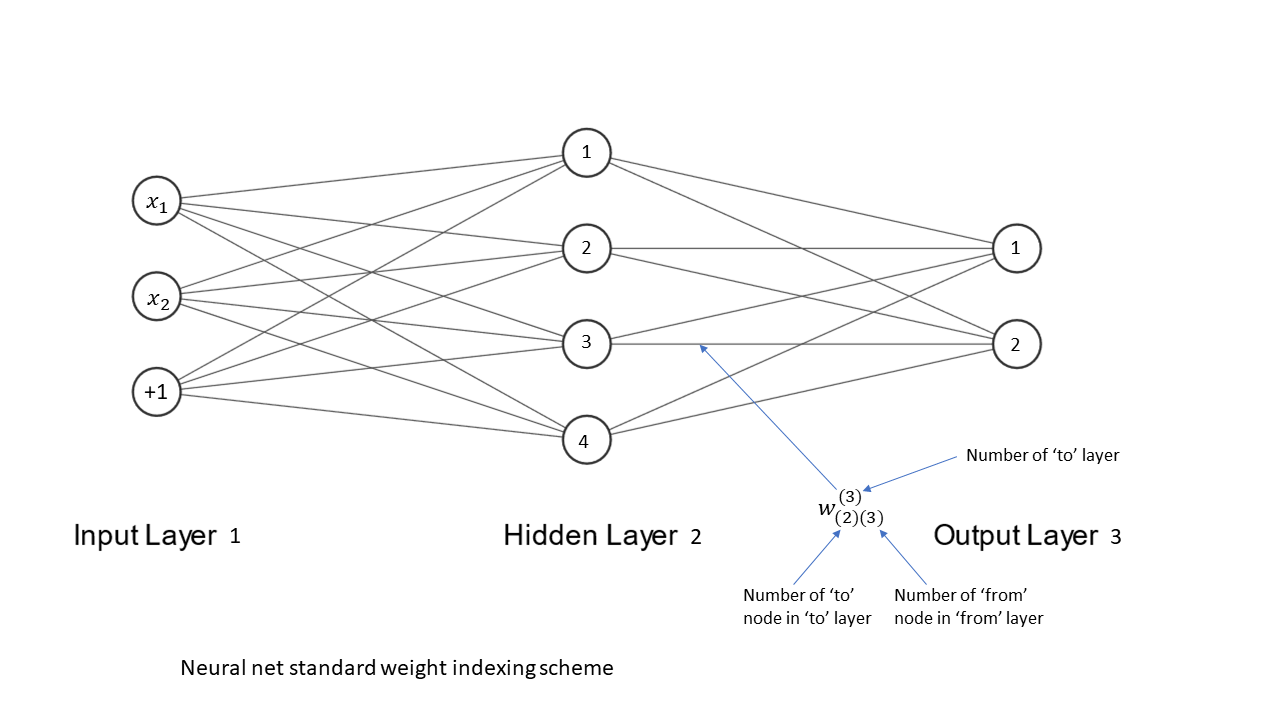

In [9]:
Image(filename='images/simple.png')

The above image describes the weight indexing scheme. Each edge in the graph corresponds to a weight. The upper index is the number of the layer (in this case 3) that the edge is pointing to. The lower subscript contains two indices; the first is the index of the node in the next layer that the edge is pointing to, and the second is the index of the node in the previous layer that the edge originates from.  

This indexing scheme makes matrix notation work out nicely when the expressions are vectorized.

### Dimensions of the weight and bias matrices

If layer l-1 has N nodes, and layer l has M nodes -- this is N+1 and M+! if you include the bias (+1) nodes in each layer -- then 

$$ a^l = \sigma(W^l\cdot a^{l-1} + b^l) = \sigma (z^l).$$

$a^l$ is an M-vector, $b^l$ is an M-vector, $W^l$ is an MxN (to x from) matrix, and $a^{l-1}$ is an N-vector.

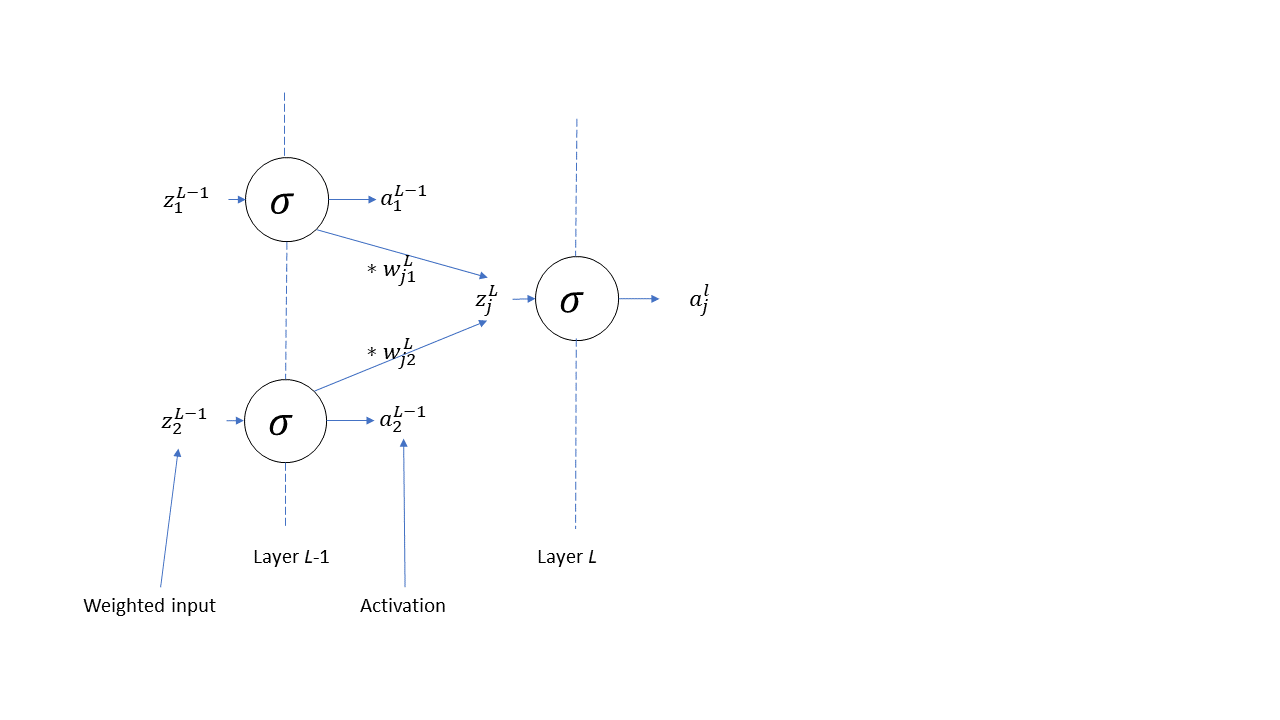

In [10]:
Image(filename="images/simple3.png")

The image above shows what happens at individual nodes. 

At layer L-1, sums of weighted activations from layer L-2 arrive at each node. These are called 'weighted inputs'. An activation function $\sigma$ is applied to each weighted input $z_i^{L-1}$ at each node, producing activations $a_i^{L-1}$. 

Focusing now on the j-th node in layer L, the activations $w^L_{ji}$ from the nodes $i$ in layer $L-1$ are multiplied by weights $w_{ji}^L$, and are summed to form the weighted input $z^L_j$. An activation function $\sigma$ is then applied to $z^L_j$ to produce the activation $a_j^L$.

### Activation

The activation $a_j^L$ is the output of the j-th neuron in the $L$-th layer:
$$ a_j^L= \sigma(\Sigma_k w_{jk}^L\cdot a_k^{L-1} + b_j^L).$$



Vectorized, this becomes the simpler expression:
$$ a^L = \sigma(W^L\cdot a^{L-1} + b^L), $$
where $W^L$ is the weight matrix whose elements are $w^L_{jk}$.

### Weighted Input

We define the weighted input
$$z^L_j = \Sigma_k w^l_{jk}a_k^{L-1} + b_j^L,$$
which is the sum of weighted activations from the previous layer, before the layer L activation is applied. 

### Error in the jth neuron in layer L

The error in the j-th neuron in layer L is defined to be

$$ \delta^L_j=\frac{\delta C}{\delta z^L_j}.$$

This is the derivative of the ultimate cost function $C$ with respect to the weighted input at node j, layer L.

Backpropagation computes this quantity for all of the nodes, and then there is a little extra work to get the desired derivatives with respect to the weights, $\frac{\delta C}{\delta w_{jk}^L}$ and $\frac{\delta C}{\delta b_j^L}$.

### Error in the output layer (equation BP1)

$$ \delta^L_j=\frac{\delta C}{\delta z^L_j}=\frac{\delta C}{\delta a^L_j}\cdot\sigma'(z_j^L).$$

This is because: 

$$ \frac{\delta C}{\delta a^L_j} = \frac{\delta C}{\delta z^L_j}\cdot\frac{\delta z^L_j}{\delta a^L_j} = \frac{\delta C}{\delta z^L_j}\cdot \frac{1}{\sigma'(z_j^L)}.$$

### Vectorized form of BP1

$$ \delta^L = \nabla_a C \odot \sigma'(z^L).$$

Note that this is the gradient of the cost function with respect to the final output activations, multiplied by the derivative of the activation function with respect to the vector of weighted inputs to the final layer. 

### Error in layer L  as a function of error in layer L+1 (equation BP2)

$$ \delta^l_j = \Sigma w_{jk}^{l+1}\delta_k^{l+1}\sigma'(z_j^l).$$

This is because 

$$ \delta^l_j = \frac{\delta C}{\delta z_j^l} =$$
$$ \Sigma_k \frac{\delta C}{\delta z_k^{l+1}}\frac{\delta z_k^{l+1}}{\delta z_j^l} =$$
$$ \Sigma_k \delta ^{l+1}_k \cdot \frac{\delta z_k^{l+1}}{\delta z_j^l}.$$

Since 
$$ z_k^{l+1} = \Sigma_i w_{ki}^{l+1}\sigma(z_i^l)+b_k^l,$$ 

$$ \frac{\delta z_k^{l+1}}{\delta z_j^l} = w_{kj}^{l+1}\sigma'(z_j^l).$$

### Vectorized form of equation BP2

$$ \delta^l = ((W^{l+1})^T\delta^{l+1})\odot\sigma'(z_j^l).$$

Think of $(W^{l+1})^T\delta^{l+1}$ as moving the error backward through the network edges from layer l+1.

Think of $\sigma'(z_j^l)$ as moving error backward across the activation node in layer l to the weighted input $z^l_j$.

### Derivatives of the cost function with respect to the biases $b_j^l$.

$$\frac{\delta C}{\delta b_j^l} = \delta_j^l,$$

because

$$ \frac{\delta C}{\delta b_j^l} = \frac{\delta C}{\delta z_j^l} \cdot \frac{\delta z_j^l}{\delta b_j^l} = \delta_j^l \cdot 1.$$

### Derivatives of the cost function with respect to the weights $w_{ji}^l$.

$$ \frac{\delta C}{\delta w_{ji}^l} = \frac{\delta C}{\delta z_j^l} \cdot \frac{\delta z_j^l}{\delta w_{ji}^l} =
 \delta_j^l\cdot a_i^{l-1},$$

because

$$ \frac{\delta z_j^l}{\delta w_{ji}^l} = a_i^{l-1}. $$

In words, this is the product of the activation from the 'from' node (index i) and the error in the 'to' node (index j).